In [2]:
!pip install persiantools

In [3]:
import warnings
import datetime, pytz
from persiantools.jdatetime import JalaliDate
from persiantools.jdatetime import JalaliDateTime
import jalali
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

Matplotlib is building the font cache; this may take a moment.


In [14]:
data=pd.read_excel(r'/media/hamid/Local Disk/Projects/Data Mining on gas Network/NEWELECTRICITY.xlsx',
                  dtype={'date':"string"})
data.head()


,Column_1,row,week day,unique row,Unnamed: 3,date,report time,CT,UDC,UDCC,...,CN,CPN,TNOS,reporter,TOO,WR,year,month,day,Recoded report time
0,0,1,سه شنبه,1087467426,NaN,1395-01-31 00:00:00,22:33:00,22:50:00,NaN,0,...,NaN,NaN,0,مشترک,---,---,1395,1,31,22
1,1,2,سه شنبه,1087467260,NaN,1395-01-31 00:00:00,19:22:00,19:30:00,NaN,0,...,NaN,NaN,0,مشترک,---,---,1395,1,31,19
2,2,3,سه شنبه,1157467260,NaN,1395-01-31 00:00:00,19:21:00,19:33:00,NaN,0,...,NaN,NaN,0,مشترک,---,---,1395,1,31,19
3,3,4,سه شنبه,1157467172,NaN,1395-01-31 00:00:00,18:25:00,18:35:00,NaN,0,...,NaN,NaN,0,مشترک,---,---,1395,1,31,18
4,4,5,سه شنبه,1087467163,NaN,1395-01-31 00:00:00,18:20:00,19:00:00,NaN,0,...,NaN,NaN,0,مشترک,---,---,1395,1,31,18


In [15]:
Grouped_Data=data.groupby("date").agg(
    {
        'ENS':'mean',
    }
).reset_index()

In [20]:
time=list()
for i in Grouped_Data['date']:
    i=i.split()
    yeardaymonth=i[0].split("-")
    #hourandminute=i[1].split(":")
    time.append(JalaliDateTime(int(yeardaymonth[0]),int(yeardaymonth[1]),int(yeardaymonth[2])).to_gregorian())
Grouped_Data['date']=time

In [24]:
Grouped_Data=Grouped_Data.set_index('date')

In [25]:
Grouped_Data

,ENS
date,
2016-03-20,5.593870
2016-03-21,53.604304
2016-03-22,12.300666
2016-03-23,4.713653
2016-03-24,150.646715
...,...
2019-03-16,312.219222
2019-03-17,286.904438
2019-03-18,31.874342


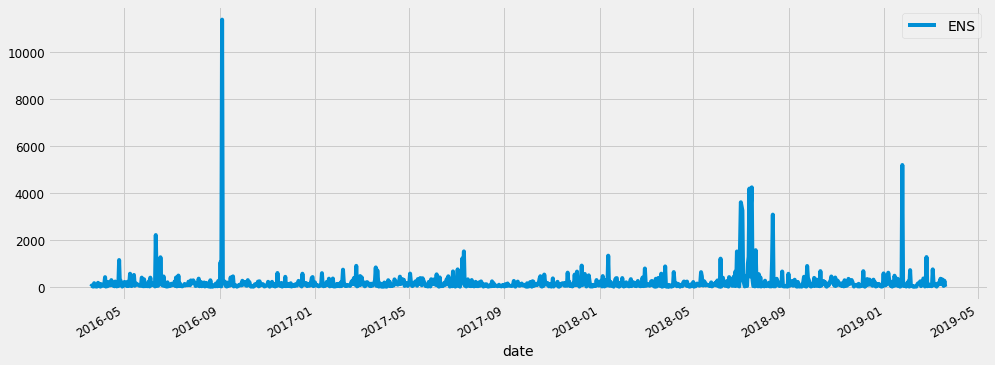

In [28]:
Grouped_Data.plot(figsize=(15, 6))
plt.show()

In [29]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [39]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Grouped_Data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

IndentationError: unexpected unindent (<ipython-input-39-92a66fee545b>, line 9)

In [70]:
mod = sm.tsa.statespace.SARIMAX(Grouped_Data,
                                order=(1, 1, 1),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/home/hamid/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/hamid/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/hamid/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1312      0.014      9.297      0.000       0.104       0.159
ma.L1         -0.9572      0.007   -141.480      0.000      -0.970      -0.944
ar.S.L12      -0.9151      0.021    -43.233      0.000      -0.957      -0.874
ar.S.L24       0.0270      0.019      1.446      0.148      -0.010       0.064
ma.S.L12      -0.0547      0.021     -2.560      0.010      -0.096      -0.013
ma.S.L24      -0.9740      0.031    -30.954      0.000      -1.036      -0.912
sigma2      2.479e+05   6309.684     39.293      0.000    2.36e+05     2.6e+05


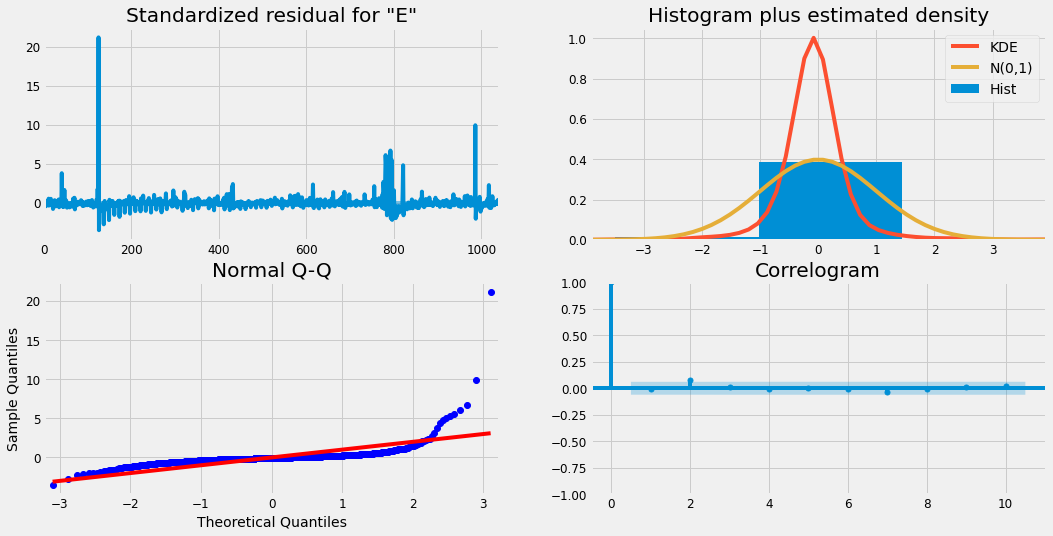

In [71]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

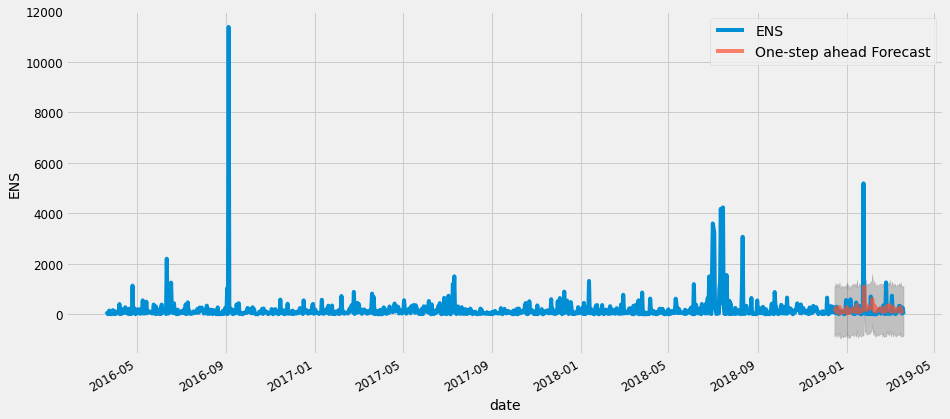

In [50]:
pred = results.get_prediction(start=pd.to_datetime('2018-12-15'), dynamic=False)
pred_ci = pred.conf_int()
ax = Grouped_Data.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('ENS')
plt.legend()
plt.show()

In [64]:
y_forecasted = pred.predicted_mean
y_truth = Grouped_Data['2018-12-15':].ENS
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 320338.54


In [65]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 565.98
